In [59]:
import pandas as pd
import os
import matplotlib.pyplot as plt

**Task 1:** Merging all csvs into a single csv file

In [60]:
df = pd.read_csv("/kaggle/input/sales-dataset/Sales_April_2019.csv")

files = [file for file in os.listdir('/kaggle/input/sales-dataset')]

year_data = pd.DataFrame()

for file in files:
    df = pd.read_csv('/kaggle/input/sales-dataset/' + file)
    year_data = pd.concat([year_data, df])

year_data.to_csv('year_data.csv', index = False)

**Read the Updated Frame**

In [61]:
year_data = pd.read_csv('/kaggle/working/year_data.csv')
year_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,236670,Wired Headphones,2,11.99,08/31/19 22:21,"359 Spruce St, Seattle, WA 98101"
1,236671,Bose SoundSport Headphones,1,99.99,08/15/19 15:11,"492 Ridge St, Dallas, TX 75001"
2,236672,iPhone,1,700.0,08/06/19 14:40,"149 7th St, Portland, OR 97035"
3,236673,AA Batteries (4-pack),2,3.84,08/29/19 20:59,"631 2nd St, Los Angeles, CA 90001"
4,236674,AA Batteries (4-pack),2,3.84,08/15/19 19:53,"736 14th St, New York City, NY 10001"


***Data Cleaning***

**Dropping the NaN Rows**

In [62]:
nan_rows = year_data[year_data.isna().any(axis = 1)]
nan_rows.head()

###Removing the NaN Rows.
year_data = year_data.dropna(how='all')
year_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,236670,Wired Headphones,2,11.99,08/31/19 22:21,"359 Spruce St, Seattle, WA 98101"
1,236671,Bose SoundSport Headphones,1,99.99,08/15/19 15:11,"492 Ridge St, Dallas, TX 75001"
2,236672,iPhone,1,700.0,08/06/19 14:40,"149 7th St, Portland, OR 97035"
3,236673,AA Batteries (4-pack),2,3.84,08/29/19 20:59,"631 2nd St, Los Angeles, CA 90001"
4,236674,AA Batteries (4-pack),2,3.84,08/15/19 19:53,"736 14th St, New York City, NY 10001"


**Finding 'Or' and Deleting it.**

In [63]:
year_data = year_data[year_data['Order Date'].str[0:2] != 'Or']

**Converting Columns to the Correct Type**

In [64]:
year_data['Quantity Ordered'] = pd.to_numeric(year_data['Quantity Ordered'])
year_data['Price Each']  = pd.to_numeric(year_data['Price Each'])

***Data Processing***

**Processing Data for Additional Columns**

Add Month Column

In [65]:
year_data['Month'] = year_data['Order Date'].str[0:2]
year_data['Month'] = year_data['Month'].astype('int32')
year_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,236670,Wired Headphones,2,11.99,08/31/19 22:21,"359 Spruce St, Seattle, WA 98101",8
1,236671,Bose SoundSport Headphones,1,99.99,08/15/19 15:11,"492 Ridge St, Dallas, TX 75001",8
2,236672,iPhone,1,700.00,08/06/19 14:40,"149 7th St, Portland, OR 97035",8
3,236673,AA Batteries (4-pack),2,3.84,08/29/19 20:59,"631 2nd St, Los Angeles, CA 90001",8
4,236674,AA Batteries (4-pack),2,3.84,08/15/19 19:53,"736 14th St, New York City, NY 10001",8


**Add Sales Column**

In [66]:
year_data['Sales'] = year_data['Quantity Ordered'] * year_data['Price Each']
year_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,236670,Wired Headphones,2,11.99,08/31/19 22:21,"359 Spruce St, Seattle, WA 98101",8,23.98
1,236671,Bose SoundSport Headphones,1,99.99,08/15/19 15:11,"492 Ridge St, Dallas, TX 75001",8,99.99
2,236672,iPhone,1,700.00,08/06/19 14:40,"149 7th St, Portland, OR 97035",8,700.00
3,236673,AA Batteries (4-pack),2,3.84,08/29/19 20:59,"631 2nd St, Los Angeles, CA 90001",8,7.68
4,236674,AA Batteries (4-pack),2,3.84,08/15/19 19:53,"736 14th St, New York City, NY 10001",8,7.68


**Add City Column**

In [67]:
def get_state(address):
    return address.split(',')[2]

year_data['City'] = year_data['Purchase Address'].apply(lambda x: x.split(',')[1] + ', ' + get_state(x).split(' ')[1])
year_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,236670,Wired Headphones,2,11.99,08/31/19 22:21,"359 Spruce St, Seattle, WA 98101",8,23.98,"Seattle, WA"
1,236671,Bose SoundSport Headphones,1,99.99,08/15/19 15:11,"492 Ridge St, Dallas, TX 75001",8,99.99,"Dallas, TX"
2,236672,iPhone,1,700.00,08/06/19 14:40,"149 7th St, Portland, OR 97035",8,700.00,"Portland, OR"
3,236673,AA Batteries (4-pack),2,3.84,08/29/19 20:59,"631 2nd St, Los Angeles, CA 90001",8,7.68,"Los Angeles, CA"
4,236674,AA Batteries (4-pack),2,3.84,08/15/19 19:53,"736 14th St, New York City, NY 10001",8,7.68,"New York City, NY"


**Question # 1:** What was the best month for revenue? How much was earned?

In [68]:
results = year_data.groupby('Month').sum()

*Plotting*

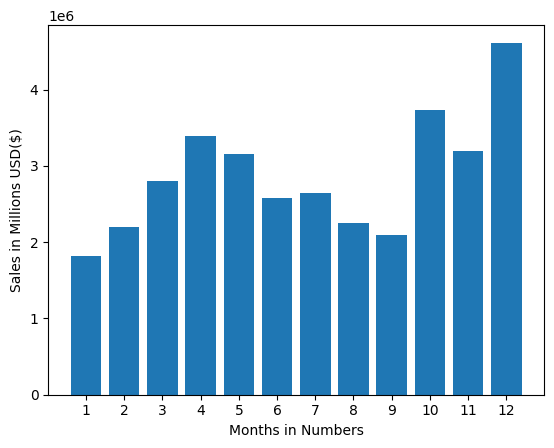

In [69]:
months = range(1, 13)
plt.bar(months, results['Sales'])
plt.xticks(months)
plt.ylabel('Sales in Millions USD($)')
plt.xlabel('Months in Numbers')

plt.show()

**Finding:**

The graph depicting sales data reveals a distinct and pronounced peak during the month of December, suggesting a substantial surge in sales during this period. This surge is likely attributed to the holiday season, particularly Christmas, where individuals engage in gift-giving practices. The noticeable uptick in sales during December aligns with the festive tradition of exchanging presents, reflecting a significant impact on overall purchasing behavior. The data strongly implies a positive correlation between the holiday season, specifically Christmas, and heightened consumer spending, as people actively participate in the joyous act of gifting, thereby contributing to the observed peak in sales during the month of December.

***Question # 2:*** Which city had the highest number of sales?

In [70]:
results = year_data.groupby('City').sum()

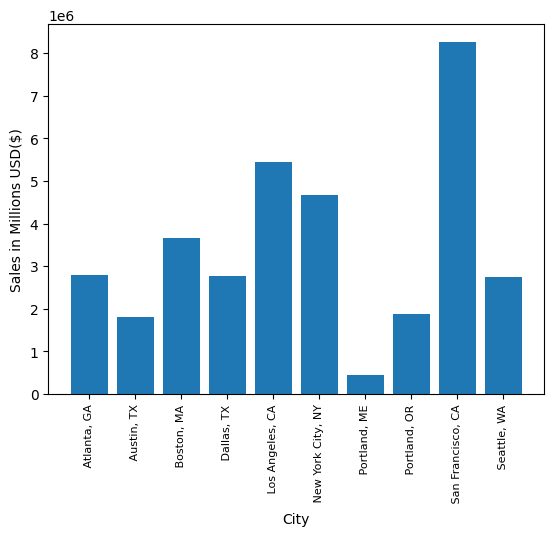

In [71]:
cities = [city for city, df in year_data.groupby('City')]

plt.bar(cities, results['Sales'])
plt.xticks(cities, rotation='vertical', size=8)
plt.ylabel('Sales in Millions USD($)')
plt.xlabel('City')

plt.show()

**Findings:**

San Francisco's prominence as part of Silicon Valley, a global hub for technology and innovation, likely plays a pivotal role in driving elevated sales figures. The concentration of tech-related industries and a tech-savvy population in San Francisco could contribute to a heightened demand for electronics, thereby influencing the sales landscape. This geographical connection between the business's focus on electronics and the tech-centric environment of San Francisco suggests a strategic alignment that positively impacts overall sales performance in this region.

**Question # 3:** What time should we advertise to increase the chances of sales?

In [72]:
year_data['Order Date'] = pd.to_datetime(year_data['Order Date'])

/tmp/ipykernel_41/2924594726.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  year_data['Order Date'] = pd.to_datetime(year_data['Order Date'])


In [73]:
year_data['Hour'] = year_data['Order Date'].dt.hour
year_data['Minute'] = year_data['Order Date'].dt.minute
year_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
0,236670,Wired Headphones,2,11.99,2019-08-31 22:21:00,"359 Spruce St, Seattle, WA 98101",8,23.98,"Seattle, WA",22,21
1,236671,Bose SoundSport Headphones,1,99.99,2019-08-15 15:11:00,"492 Ridge St, Dallas, TX 75001",8,99.99,"Dallas, TX",15,11
2,236672,iPhone,1,700.00,2019-08-06 14:40:00,"149 7th St, Portland, OR 97035",8,700.00,"Portland, OR",14,40
3,236673,AA Batteries (4-pack),2,3.84,2019-08-29 20:59:00,"631 2nd St, Los Angeles, CA 90001",8,7.68,"Los Angeles, CA",20,59
4,236674,AA Batteries (4-pack),2,3.84,2019-08-15 19:53:00,"736 14th St, New York City, NY 10001",8,7.68,"New York City, NY",19,53


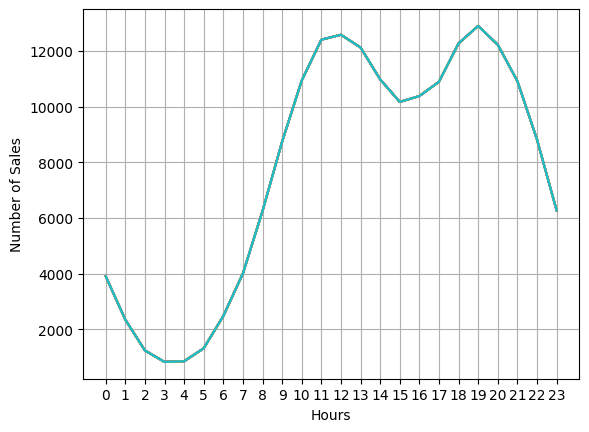

In [74]:
hours = [hour for hour, df in year_data.groupby('Hour')]

plt.plot(hours, year_data.groupby(['Hour']).count())
plt.xticks(hours)
plt.xlabel('Hours')
plt.ylabel('Number of Sales')
plt.grid()
plt.show()

**Findings:**

The graph depicts a distinct sales pattern, with notable peaks observed around 11:00 AM and 12:00 PM, as well as around 7:00 PM. These peaks suggest a correlation between increased sales and specific times of the day. The surge in sales during the late morning hours could be attributed to individuals taking a break from work or engaging in online shopping during lunchtime. Similarly, the evening peak around 7:00 PM implies a surge in consumer activity, possibly after individuals have returned from work and completed their daily tasks. These findings suggest that concentrating advertising efforts during these time frames may prove particularly effective, as potential customers are more likely to be actively engaged in shopping activities during these periods. By strategically targeting promotions and advertisements during these peak hours, businesses can optimize their outreach and capitalize on the times when consumer engagement is at its highest.

**Question # 4** What products were often bought together?

In [75]:
df = year_data[year_data['Order ID'].duplicated(keep=False)]

df['Bought Together'] = df.groupby('Order ID')['Product'].transform(lambda x: ', '.join(x))
df = df[['Order ID', 'Bought Together']].drop_duplicates()

df.head()

/tmp/ipykernel_41/3480352718.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Bought Together'] = df.groupby('Order ID')['Product'].transform(lambda x: ', '.join(x))


,Order ID,Bought Together
46,236716,"AA Batteries (4-pack), USB-C Charging Cable"
60,236729,"iPhone, Apple Airpods Headphones"
62,236730,"Google Phone, Wired Headphones"
132,236799,"Google Phone, Wired Headphones"
163,236829,"Vareebadd Phone, USB-C Charging Cable"


**Question # 5** What product sold the most and Why?

In [81]:
productGroup = year_data.groupby('Product')

year_data['Quantity Ordered'] = pd.to_numeric(year_data['Quantity Ordered'], errors='coerce')

# Drop rows with NaN values in 'Quantity Ordered' column
year_data = year_data.dropna(subset=['Quantity Ordered'])

# Group by 'Product' and sum 'Quantity Ordered'
productGroup = year_data.groupby('Product')
quantityOrdered = productGroup['Quantity Ordered'].sum()

products = [product for product, df in productGroup]

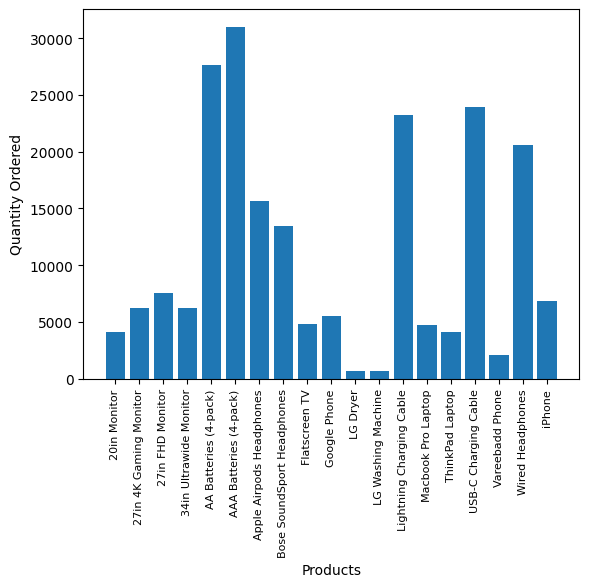

In [85]:
plt.bar(products, quantityOrdered)
plt.xticks(products, rotation='vertical', size=8)
plt.ylabel('Quantity Ordered')
plt.xlabel('Products')

plt.show()

**Findings: Why?**

AAA Batteries stand out with the highest number of orders, followed closely by AA Batteries. The data suggests a correlation between the popularity of AAA Batteries and their relatively low prices. Notably, AA Batteries also exhibit significant sales, although slightly lower than AAA Batteries, possibly due to their comparatively higher prices. This trend implies that pricing may indeed play a crucial role in driving consumer preferences, as customers seem inclined towards products with more budget-friendly costs, as evidenced by the robust demand for both AAA and AA Batteries.